In [1]:
from typing import Annotated
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(BaseModel):
    a: Annotated[int,Field(...,description="integer a variable")]
    b: Annotated[int,Field(...,description="integer b variable")]
    add_result:Annotated[int,Field(default=0,description="addition result variable")] 
    final_result:Annotated[int,Field(default=0,description="final result variable")] 

In [8]:
def add_node(state: AgentState) -> AgentState:
    state.add_result = state.a + state.b
    print(f"🔹 Add: {state.a} + {state.b} = {state.add_result}")
    return state

def multiply_node(state: AgentState) -> AgentState:
    state.final_result = state.add_result * 2
    print(f"🔸 Multiply: {state.add_result} * 2 = {state.final_result}")
    return state

graph = StateGraph(AgentState)
graph.add_node("add", add_node)
graph.add_node("multiply", multiply_node)
graph.add_edge(START, "add")
graph.add_edge("add", "multiply")
graph.add_edge("multiply", END)

app = graph.compile()

In [9]:
final_state = app.invoke({"a": 5, "b": 3})
print("\n✅ Final State:", final_state)

🔹 Add: 5 + 3 = 8
🔸 Multiply: 8 * 2 = 16

✅ Final State: {'a': 5, 'b': 3, 'add_result': 8, 'final_result': 16}


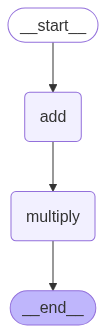

In [5]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))